# library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing DB

# Tables

* Sales	
* Discount	
* Quantity	
* Category, Sub-Category	
* Region, Market	
* Ship Mode	
* Segment	

In [13]:
order = pd.read_csv(r"C:\Users\tannaz hafezi\Desktop\order.csv", encoding='utf-8') 
order_details = pd.read_csv(r"C:\Users\tannaz hafezi\Desktop\order_detail.csv", encoding='utf-8') 
product = pd.read_csv(r"C:\Users\tannaz hafezi\Desktop\product.csv", encoding='utf-8') 
customer = pd.read_csv(r"C:\Users\tannaz hafezi\Desktop\customer.csv", encoding='utf-8') 
shipping = pd.read_csv(r"C:\Users\tannaz hafezi\Desktop\shipping.csv", encoding='utf-8')

In [3]:
print(order_details.columns)
print(order.columns)

Index(['Row ID', 'Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost'],
      dtype='object')
Index(['Order ID', 'Customer ID', 'Order Priority', 'Order Date', 'Market'], dtype='object')


In [14]:
df = (
    order_details
    .merge(order, on="Order ID", how="left")      
    .merge(product, on="Product ID", how="left") 
    .merge(customer, on="Customer ID", how="left") 
    .merge(shipping, on="Order ID", how="left") 
)


In [4]:
df.head()

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Shipping Cost,Customer ID,Order Priority,...,Sub-Category,Customer Name,Segment,Shipping ID,Ship Date,Ship Mode,City,State,Country,Region
0,1,MX-2014-143658,OFF-LA-10002782,13.08,3,0.0,4.56,1.033,SC-20575,Medium,...,Labels,Sonia Cooley,Consumer,44634,2014-10-06 00:00:00,Standard Class,Mexico City,Distrito Federal,Mexico,North
1,2,MX-2012-155047,FUR-FU-10004015,252.16,8,0.0,90.72,13.449,KW-16570,Medium,...,Furnishings,Kelly Williams,Consumer,34096,2012-10-20 00:00:00,Standard Class,Dos Quebradas,Risaralda,Colombia,South
2,3,MX-2012-155047,FUR-BO-10002352,193.28,2,0.0,54.08,9.627,KW-16570,Medium,...,Bookcases,Kelly Williams,Consumer,34096,2012-10-20 00:00:00,Standard Class,Dos Quebradas,Risaralda,Colombia,South
3,4,MX-2012-155047,OFF-BI-10004428,35.44,4,0.0,4.96,1.371,KW-16570,Medium,...,Binders,Kelly Williams,Consumer,34096,2012-10-20 00:00:00,Standard Class,Dos Quebradas,Risaralda,Colombia,South
4,5,MX-2012-155047,OFF-AR-10004594,71.60,2,0.0,11.44,3.787,KW-16570,Medium,...,Art,Kelly Williams,Consumer,34096,2012-10-20 00:00:00,Standard Class,Dos Quebradas,Risaralda,Colombia,South


# EDA

In [6]:
print("Number of Obsevation", df.shape[0])
print("Number of variables", df.shape[1])

Number of Obsevation 49670
Number of variables 24


In [7]:
# Get the number of unique rows
unique_rows_count = len(df.drop_duplicates())
print(unique_rows_count)

49670


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49670 entries, 0 to 49669
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          49670 non-null  int64  
 1   Order ID        49670 non-null  object 
 2   Product ID      49670 non-null  object 
 3   Sales           49670 non-null  float64
 4   Quantity        49670 non-null  int64  
 5   Discount        49670 non-null  float64
 6   Profit          49670 non-null  float64
 7   Shipping Cost   49670 non-null  float64
 8   Customer ID     49670 non-null  object 
 9   Order Priority  49670 non-null  object 
 10  Order Date      49670 non-null  object 
 11  Market          49670 non-null  object 
 12  Product Name    49670 non-null  object 
 13  Category        49670 non-null  object 
 14  Sub-Category    49670 non-null  object 
 15  Customer Name   49670 non-null  object 
 16  Segment         49670 non-null  object 
 17  Shipping ID     49670 non-null 

In [9]:
# Numerical summary
df.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Shipping ID
count,49670.000000,49670.000000,49670.000000,49670.000000,49670.000000,49670.000000,49670.000000
mean,25763.380974,243.840355,3.470787,0.143070,28.392264,26.041125,31632.081639
std,14838.084164,485.963091,2.274854,0.212046,172.399520,56.870281,6964.662856
min,1.000000,0.444000,1.000000,0.000000,-6599.980000,0.002000,21043.000000
25%,12749.250000,30.384000,2.000000,0.000000,0.000000,2.580000,25564.000000
50%,26073.500000,83.970000,3.000000,0.000000,9.154000,7.660000,30862.000000
75%,38522.750000,247.830000,5.000000,0.200000,36.266400,23.969000,37182.750000
max,51290.000000,22638.500000,14.000000,0.850000,8399.980000,933.570000,46075.000000


In [10]:
# Categorical summary
categorical_summary = {}
for col in df.select_dtypes(include=['object']).columns:
    categorical_summary[col] = df[col].value_counts().to_dict()
    
categorical_summary

{'Order ID': {'CA-2014-100111': 14,
  'MX-2014-166541': 13,
  'IN-2012-41261': 13,
  'IN-2013-42311': 13,
  'NI-2014-8880': 13,
  'TO-2014-9950': 13,
  'MX-2013-127705': 12,
  'IN-2011-76625': 12,
  'IN-2014-15263': 12,
  'CA-2014-157987': 12,
  'MX-2013-142678': 12,
  'SF-2014-3260': 11,
  'US-2013-108504': 11,
  'IN-2012-44194': 11,
  'ES-2014-5605089': 11,
  'IN-2013-78809': 11,
  'IZ-2011-770': 11,
  'MX-2013-134453': 11,
  'CA-2013-165330': 11,
  'MX-2013-159100': 11,
  'IN-2014-78151': 11,
  'SA-2013-7790': 11,
  'IN-2011-27968': 10,
  'NI-2011-7830': 10,
  'US-2011-102281': 10,
  'SA-2012-4510': 10,
  'ID-2011-77619': 10,
  'SU-2014-5140': 10,
  'IN-2013-17699': 10,
  'CG-2013-3660': 10,
  'ES-2014-2756281': 10,
  'SG-2013-6790': 10,
  'MX-2011-100587': 10,
  'IN-2014-27303': 10,
  'IN-2012-40029': 10,
  'IN-2014-46777': 10,
  'US-2012-126977': 10,
  'IT-2014-4709866': 10,
  'MX-2014-136539': 10,
  'MO-2013-4200': 10,
  'MX-2014-167493': 10,
  'IN-2014-19274': 10,
  'CA-2013-105

In [11]:
def count_outliers(series):
    if pd.api.types.is_numeric_dtype(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return ((series < lower) | (series > upper)).sum()
    else:
        return 0

Summary = pd.DataFrame({
    "Variables": df.columns,
    "Data Type": df.dtypes.values,
    "Number of unique observation": [df[col].nunique() for col in df.columns],
    "Number of missing": [df[col].isna().sum() for col in df.columns],
    "Number of Outliers": [count_outliers(df[col]) for col in df.columns],
})

display(Summary.head(len(df.columns)))

,Variables,Data Type,Number of unique observation,Number of missing,Number of Outliers
0,Row ID,int64,49670,0,0
1,Order ID,object,25033,0,0
2,Product ID,object,10246,0,0
3,Sales,float64,22513,0,5466
4,Quantity,int64,14,0,847
5,Discount,float64,27,0,3981
6,Profit,float64,24077,0,9448
7,Shipping Cost,float64,16590,0,5744
8,Customer ID,object,1589,0,0
9,Order Priority,object,4,0,0


In [12]:
df['Region'].value_counts()

Central           10249
South              6490
EMEA               4835
North              4568
Africa             4453
Oceania            3487
West               3187
Southeast Asia     3129
East               2832
North Asia         2338
Central Asia       2048
Caribbean          1678
Canada              376
Name: Region, dtype: int64

In [13]:
df['Ship Mode'].value_counts()

Standard Class    29846
Second Class       9972
First Class        7232
Same Day           2620
Name: Ship Mode, dtype: int64

In [14]:
df['Category'].value_counts()

Office Supplies    30287
Technology          9788
Furniture           9595
Name: Category, dtype: int64

In [15]:
df['Sub-Category'].value_counts()

Binders        5967
Storage        4849
Art            4680
Paper          3479
Chairs         3340
Phones         3244
Furnishings    3088
Accessories    3011
Labels         2550
Envelopes      2374
Fasteners      2364
Supplies       2349
Bookcases      2319
Copiers        2133
Appliances     1675
Machines       1400
Tables          848
Name: Sub-Category, dtype: int64

In [16]:
df['Market'].value_counts()

APAC      11002
LATAM     10229
US         9948
EU         8827
EMEA       4835
Africa     4453
Canada      376
Name: Market, dtype: int64

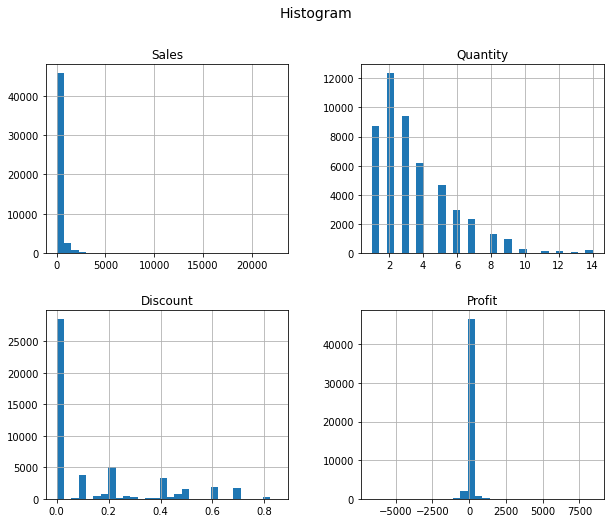

In [17]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].hist(figsize=(10,8), bins=30)
plt.suptitle("Histogram", fontsize=14)
plt.show()

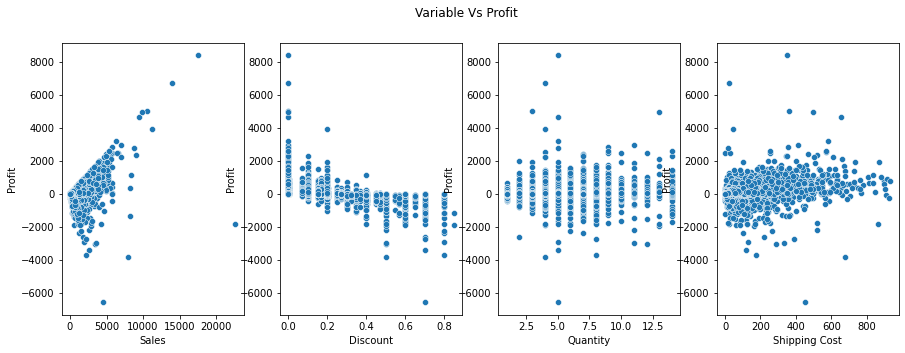

In [18]:
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(15,5))
sns.scatterplot(x='Sales', y='Profit', data=df, ax=axes[0])
sns.scatterplot(x='Discount', y='Profit', data=df, ax=axes[1])
sns.scatterplot(x='Quantity', y='Profit', data=df, ax=axes[2])
sns.scatterplot(x='Shipping Cost', y='Profit', data=df, ax=axes[3])
plt.suptitle("Variable Vs Profit")
plt.show()


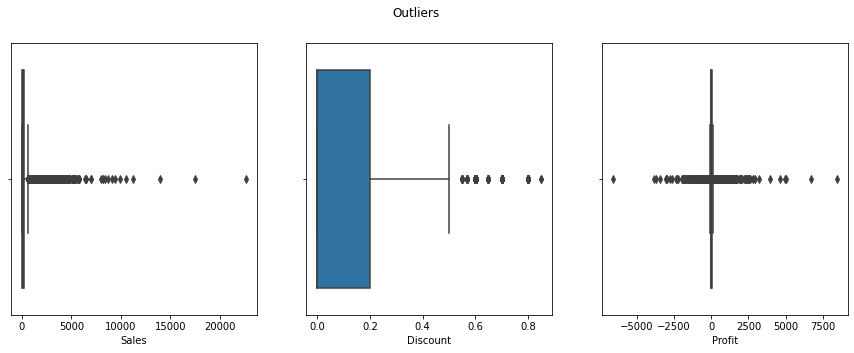

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=df['Sales'], ax=axes[0])
sns.boxplot(x=df['Discount'], ax=axes[1])
sns.boxplot(x=df['Profit'], ax=axes[2])
plt.suptitle("Outliers")
plt.show()


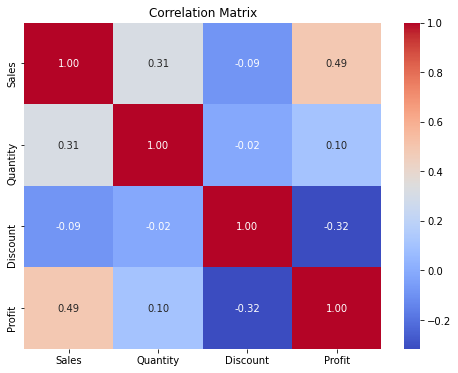

In [20]:
#Correlation Matrix
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


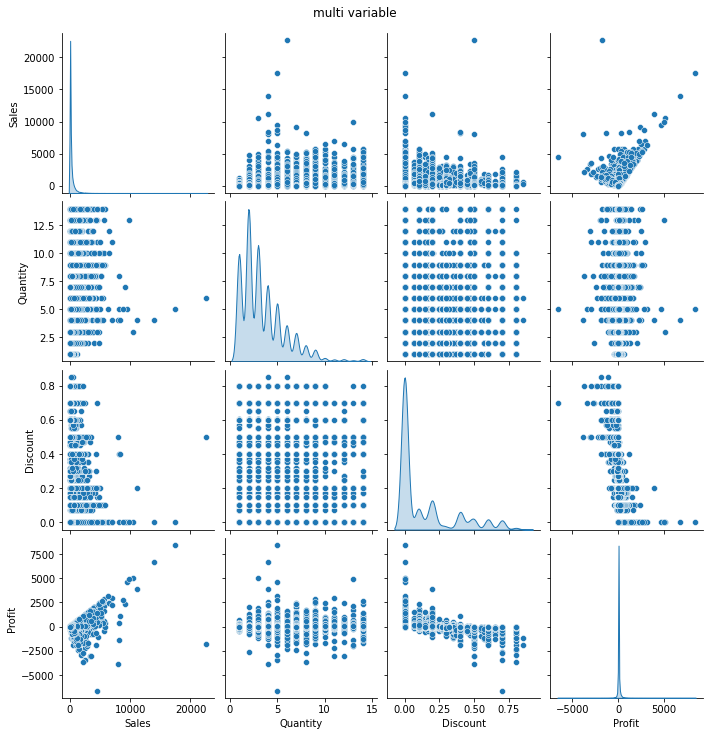

In [21]:
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit']], diag_kind='kde')
plt.suptitle("multi variable", y=1.02)
plt.show()

# Prepare Data for Modelling

In [22]:
 df.columns

Index(['Row ID', 'Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Customer ID', 'Order Priority',
       'Order Date', 'Market', 'Product Name', 'Category', 'Sub-Category',
       'Customer Name', 'Segment', 'Shipping ID', 'Ship Date', 'Ship Mode',
       'City', 'State', 'Country', 'Region'],
      dtype='object')

In [4]:
df = df.dropna(subset=['Profit'])

In [5]:
X = df[['Sales', 'Quantity', 'Discount','Shipping Cost','Market', 'Category', 'Sub-Category','Segment','Ship Mode','Region']]
y = df['Profit']

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
# Train / Validation / Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (29802, 45), Validation: (9934, 45), Test: (9934, 45)


## Standardization

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

Linear Regression is a fundamental supervised learning algorithm used to model the relationship between a dependent variable $y$ and one or more independent variables $X$ by fitting a linear equation to observed data. The model assumes the form:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon $$

where $\beta_0$ is the intercept, $\beta_i$ are coefficients representing the contribution of each feature, and $\epsilon$ is the error term.  
The algorithm estimates parameters by minimizing the **Sum of Squared Errors (SSE)** using the Ordinary Least Squares (OLS) method:

$$ J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}))^2 $$

The closed-form solution is given by:

$$ \hat{\beta} = (X^T X)^{-1} X^T y $$

Key assumptions include **linearity**, **independence**, **homoscedasticity**, **normality of residuals**, and **low multicollinearity**.  
In `sklearn.linear_model.LinearRegression`, important parameters include `fit_intercept`, `n_jobs`, and `positive`.  
Evaluation metrics typically include **MAE**, **MSE**, **RMSE**, and **R²**.  
Linear Regression is easy to interpret, computationally efficient, and effective for linearly related data, but it is sensitive to outliers and performs poorly when relationships are non-linear or when features are highly correlated.


In [28]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

# Ridge Regression

Ridge Regression, also known as **L2 Regularization**, is an extension of Linear Regression that adds a penalty term to reduce overfitting and handle multicollinearity. It modifies the Ordinary Least Squares (OLS) objective by adding the squared magnitude of the coefficients to the loss function:

$$ J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 $$

Here, $\alpha$ (also called the regularization strength or penalty term) controls the amount of shrinkage applied to the coefficients.  
- When $\alpha = 0$, Ridge Regression becomes equivalent to ordinary Linear Regression.  
- When $\alpha$ increases, the model coefficients $\beta_j$ are forced to be smaller (closer to zero), reducing variance and improving generalization.

The closed-form solution for Ridge Regression is:

$$ \hat{\beta} = (X^T X + \alpha I)^{-1} X^T y $$

where $I$ is the identity matrix and ensures that $(X^T X + \alpha I)$ is invertible even if $X^T X$ is singular.  

In `sklearn.linear_model.Ridge`, important parameters include:  
- `alpha`: regularization strength (default = 1.0)  
- `fit_intercept`: whether to calculate the intercept term  
- `solver`: algorithm used for optimization (e.g., `'auto'`, `'svd'`, `'cholesky'`, `'saga'`)  
- `max_iter`: maximum number of iterations (for iterative solvers)  

Ridge Regression assumes the same linearity, independence, and homoscedasticity conditions as Linear Regression, but it handles **multicollinearity** better and reduces model variance at the cost of a small increase in bias.  
It is well-suited for datasets with **many correlated features**, offering more stable and generalizable predictions.


In [29]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)
print(" Ridge Best Params:", grid_ridge.best_params_)

 Ridge Best Params: {'alpha': 100}


# Lasso Regression

Lasso Regression, short for **Least Absolute Shrinkage and Selection Operator**, is a regularized version of Linear Regression that uses **L1 regularization** to both prevent overfitting and perform automatic feature selection. It modifies the Ordinary Least Squares (OLS) objective function by adding the sum of the absolute values of the coefficients as a penalty:

$$ J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j| $$

Here, $\alpha$ is the **regularization strength** that controls how strongly the coefficients are penalized:
- When $\alpha = 0$, the model is equivalent to Linear Regression.  
- As $\alpha$ increases, more coefficients are shrunk toward zero, and some may become exactly zero — effectively removing those features from the model.

Unlike Ridge Regression, which only shrinks coefficients, **Lasso can eliminate irrelevant features**, making it useful for feature selection in high-dimensional datasets.

There is no closed-form analytical solution for Lasso; it is typically solved using optimization algorithms like **coordinate descent**.

In `sklearn.linear_model.Lasso`, key parameters include:  
- `alpha`: regularization strength (default = 1.0)  
- `fit_intercept`: whether to calculate the intercept term  
- `max_iter`: maximum number of iterations (for convergence)  
- `tol`: tolerance for stopping criteria  
- `selection`: algorithm for coordinate updates (`'cyclic'` or `'random'`)  

Lasso Regression assumes the same linearity and independence conditions as Linear Regression but adds sparsity to the model, improving interpretability.  
It is particularly effective when there are **many features**, and only a few are truly important.

In [30]:
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso = Lasso(max_iter=5000)
grid_lasso = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)
print("Lasso Best Params:", grid_lasso.best_params_)

C:\Users\tannaz hafezi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19514678.759283602, tolerance: 72538.60022319065
  model = cd_fast.enet_coordinate_descent(
C:\Users\tannaz hafezi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11471537.19632411, tolerance: 74409.24529632668
  model = cd_fast.enet_coordinate_descent(
C:\Users\tannaz hafezi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19923098.18226403, tolerance: 70955.94520682695
  model = cd_fast.enet_coordinate_descent(
C:\Users\tannaz hafezi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_

Lasso Best Params: {'alpha': 0.1}


# ElasticNet

In [31]:
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.5, 0.9]
}
elastic = ElasticNet(max_iter=5000)
grid_elastic = GridSearchCV(elastic, elastic_params, cv=5, scoring='r2')
grid_elastic.fit(X_train_scaled, y_train)

print("ElasticNet Best Params:", grid_elastic.best_params_)

C:\Users\tannaz hafezi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734836.6404586434, tolerance: 72538.60022319065
  model = cd_fast.enet_coordinate_descent(
C:\Users\tannaz hafezi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788668.5723599195, tolerance: 74409.24529632668
  model = cd_fast.enet_coordinate_descent(
C:\Users\tannaz hafezi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3549486.0751612186, tolerance: 70955.94520682695
  model = cd_fast.enet_coordinate_descent(
C:\Users\tannaz hafezi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_

ElasticNet Best Params: {'alpha': 0.1, 'l1_ratio': 0.9}


# Decision Tree

In [32]:
tree_params = {
    'max_depth': [5, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
}
tree = DecisionTreeRegressor(random_state=42)
grid_tree = GridSearchCV(tree, tree_params, cv=5, scoring='r2')
grid_tree.fit(X_train, y_train)
print("DecisionTree Best Params:", grid_tree.best_params_)


DecisionTree Best Params: {'max_depth': 8, 'min_samples_split': 10}


# Random Forest

In [33]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)
print("RandomForest Best Params:", grid_rf.best_params_)


RandomForest Best Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


# Gradient Boosting

### Gradient Boosting Regression

**Gradient Boosting Regression** is an ensemble machine learning method that builds a **strong predictive model** by combining multiple **weak learners** (usually shallow decision trees) in a sequential manner. Each new model is trained to correct the errors made by the previous ones. The idea is to minimize a loss function by using **gradient descent** in function space.

The general model can be represented as:

$$ F_M(x) = \sum_{m=1}^{M} \gamma_m h_m(x) $$

where:  
- $F_M(x)$ is the final prediction,  
- $h_m(x)$ is the $m^{th}$ weak learner (typically a regression tree),  
- $\gamma_m$ is the weight (learning rate × step size) assigned to each tree.

At each iteration $m$, a new tree is fitted to the **negative gradient** of the loss function (the residuals):

$$ r_{im} = - \left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x)=F_{m-1}(x)} $$

Then, the model updates as:

$$ F_m(x) = F_{m-1}(x) + \eta \gamma_m h_m(x) $$

where $\eta$ is the **learning rate** (a small positive number that controls how much each new tree contributes).

---

####  Key Parameters in `sklearn.ensemble.GradientBoostingRegressor`:
- `n_estimators`: number of boosting stages (number of trees).  
- `learning_rate`: scales the contribution of each tree (smaller values require more trees).  
- `max_depth`: maximum depth of individual regression trees (controls model complexity).  
- `subsample`: fraction of samples used for fitting each base learner (helps prevent overfitting).  
- `loss`: the loss function to minimize (e.g., `'squared_error'`, `'absolute_error'`).  
- `min_samples_split`, `min_samples_leaf`: control tree growth and generalization.  

In [34]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb, gb_params, cv=5, scoring='r2')
grid_gb.fit(X_train, y_train)
print("GradientBoosting Best Params:", grid_gb.best_params_)

GradientBoosting Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


# LightGBM Regressor

### LightGBM Regressor

**LightGBM (Light Gradient Boosting Machine)** is a highly efficient and fast implementation of gradient boosting developed by Microsoft. It is designed to handle **large-scale data** and **high-dimensional features** with superior speed and lower memory usage compared to traditional Gradient Boosting methods. LightGBM builds an ensemble of decision trees sequentially, where each tree tries to correct the errors of the previous ones, using the gradient of the loss function for optimization.

The general model can be written as:

$$ F_M(x) = \sum_{m=1}^{M} \gamma_m h_m(x) $$

where $F_M(x)$ is the final prediction, $h_m(x)$ is the $m^{th}$ decision tree, and $\gamma_m$ is the learning rate–scaled weight.

Like traditional Gradient Boosting, LightGBM minimizes a differentiable loss function:

$$ \text{Loss} = \sum_{i=1}^{n} L(y_i, F(x_i)) $$

by fitting new trees to the **negative gradient** of the loss with respect to predictions.

However, LightGBM introduces several innovations that make it faster and more efficient:
1. **Leaf-wise growth (best-first)**: instead of growing trees level by level, it splits the leaf with the largest loss reduction, leading to deeper trees and better accuracy.  
2. **Histogram-based algorithm**: continuous features are bucketed into discrete bins, reducing computation and memory.  
3. **Gradient-based One-Side Sampling (GOSS)**: keeps instances with large gradients and randomly samples others to speed up training.  
4. **Exclusive Feature Bundling (EFB)**: combines mutually exclusive features to reduce dimensionality.

---

####  Key Parameters in `lightgbm.LGBMRegressor`:
- `n_estimators`: number of boosting iterations (trees).  
- `learning_rate`: step size shrinkage used to prevent overfitting.  
- `max_depth`: maximum depth of individual trees (controls complexity).  
- `num_leaves`: number of leaves per tree (larger values increase accuracy but risk overfitting).  
- `subsample`: fraction of data used for each tree (for regularization).  
- `colsample_bytree`: fraction of features used per tree.  
- `reg_alpha`, `reg_lambda`: L1 and L2 regularization terms.  
- `min_child_samples`: minimum number of samples per leaf.  

In [37]:
#!pip install lightgbm
from lightgbm import LGBMRegressor

lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [-1, 5, 10]
}
lgbm = LGBMRegressor(random_state=42, verbose=-1)
grid_lgbm = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='r2', n_jobs=-1)
grid_lgbm.fit(X_train, y_train)

print("LightGBM Best Params:", grid_lgbm.best_params_)


LightGBM Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


# Evaluation

In [38]:
models = {
    "Linear": lr,
    "Ridge": grid_ridge.best_estimator_,
    "Lasso": grid_lasso.best_estimator_,
    "ElasticNet": grid_elastic.best_estimator_,
    "DecisionTree": grid_tree.best_estimator_,
    "RandomForest": grid_rf.best_estimator_,
    "GradientBoosting": grid_gb.best_estimator_,
    #"SVR": grid_svr.best_estimator_,
    #"XGBoost": grid_xgb.best_estimator_,
    "LightGBM": grid_lgbm.best_estimator_,
}

results = []

for name, grid in [
    ("Ridge", grid_ridge),
    ("Lasso", grid_lasso),
    ("ElasticNet", grid_elastic),
    ("DecisionTree", grid_tree),
    ("RandomForest", grid_rf),
    ("GradientBoosting", grid_gb),
    #("SVR", grid_svr),
    #("XGBoost", grid_xgb),
    ("LightGBM", grid_lgbm)
]:
    best_model = grid.best_estimator_
    best_params = grid.best_params_

    Xv = X_val_scaled if name in ['Ridge', 'Lasso', 'ElasticNet', 'Linear'] else X_val

    y_pred = best_model.predict(Xv)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    results.append({
        "Model": name,
        "Best Params": best_params,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

y_pred_lr = lr.predict(X_val_scaled)
results.append({
    "Model": "Linear",
    "Best Params": {},
    "MAE": mean_absolute_error(y_val, y_pred_lr),
    "RMSE": np.sqrt(mean_squared_error(y_val, y_pred_lr)),
    "R²": r2_score(y_val, y_pred_lr)
})

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
results_df.reset_index(drop=True, inplace=True)

print("\n (Validation Set):")
display(results_df)



 (Validation Set):


,Model,Best Params,MAE,RMSE,R²
0,GradientBoosting,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",34.722271,87.649751,0.760541
1,RandomForest,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",33.532700,94.495154,0.721678
2,DecisionTree,"{'max_depth': 8, 'min_samples_split': 10}",35.149387,98.313446,0.698731
3,XGBoost,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",36.311259,99.133035,0.693687
4,LightGBM,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",34.992351,105.431305,0.653528
5,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",58.403027,156.064903,0.240829
6,Ridge,{'alpha': 100},58.702687,156.560199,0.236002
7,Lasso,{'alpha': 0.1},58.675345,156.635728,0.235265
8,Linear,{},58.803013,156.772569,0.233928
9,SVR,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",48.309444,158.872404,0.213269


# Evaluation on Test dataset

In [39]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

Xt = X_test_scaled if best_model_name in ['Linear', 'Ridge', 'Lasso'] else X_test
y_pred_test = best_model.predict(Xt)

print(f"Best Model: {best_model_name}")
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test R²:", r2_score(y_test, y_pred_test))

Best Model: GradientBoosting
Test MAE: 34.956045053050744
Test RMSE: 86.78855866389792
Test R²: 0.7246986775057951


# feature importance

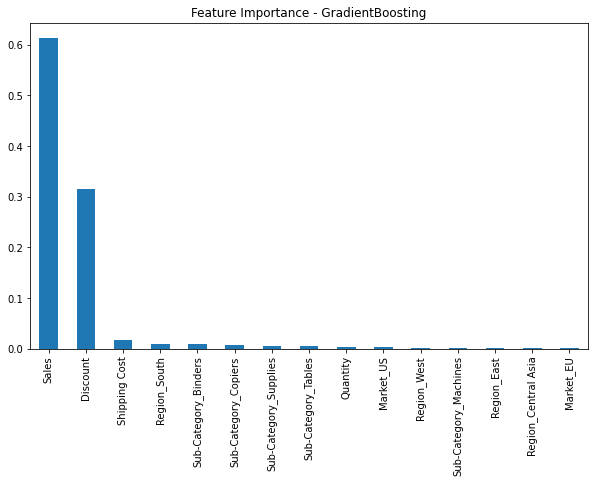

In [40]:
if hasattr(best_model, "feature_importances_"):
    importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
    plt.figure(figsize=(10,6))
    importances.plot(kind='bar')
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()

----------------------------------------------------------------------

## Modelling for each category

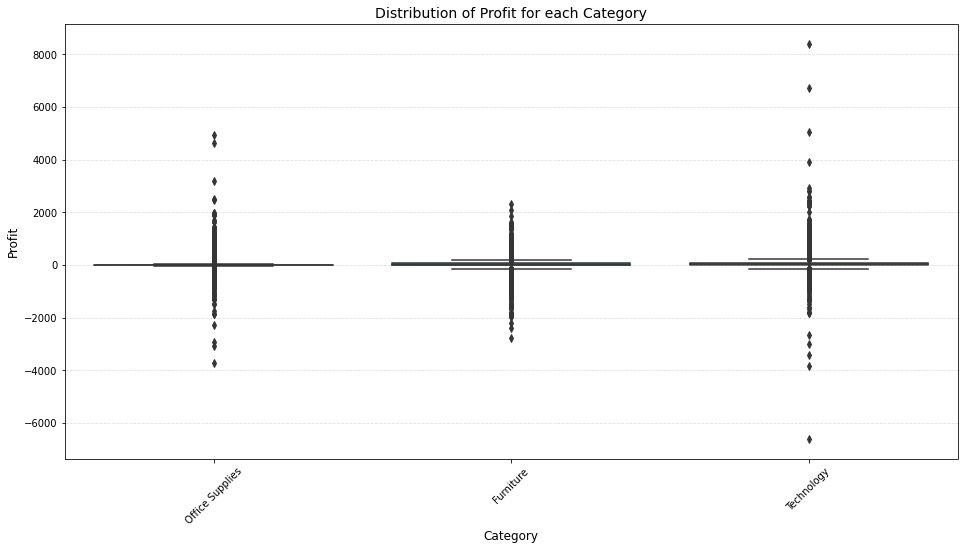

In [49]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Category',
    y='Profit',
    data=df,
    palette='viridis'
)
plt.title('Distribution of Profit for each Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

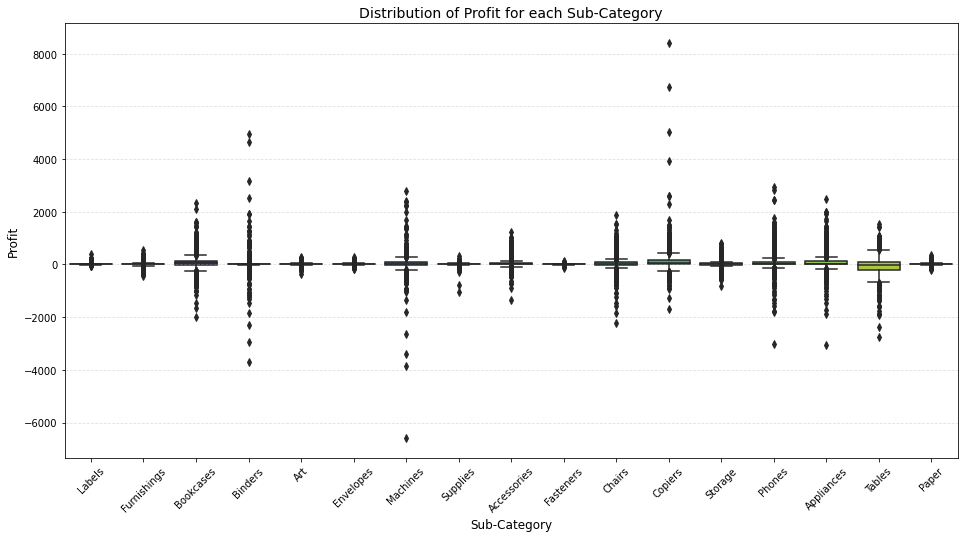

In [44]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    x='Sub-Category',
    y='Profit',
    data=df,
    palette='viridis'
)
plt.title('Distribution of Profit for each Sub-Category', fontsize=14)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

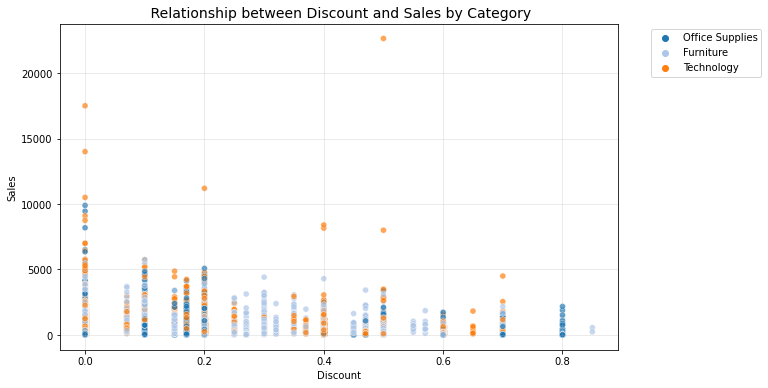

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Category', palette='tab20', alpha=0.7)
plt.title(' Relationship between Discount and Sales by Category', fontsize=14)
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


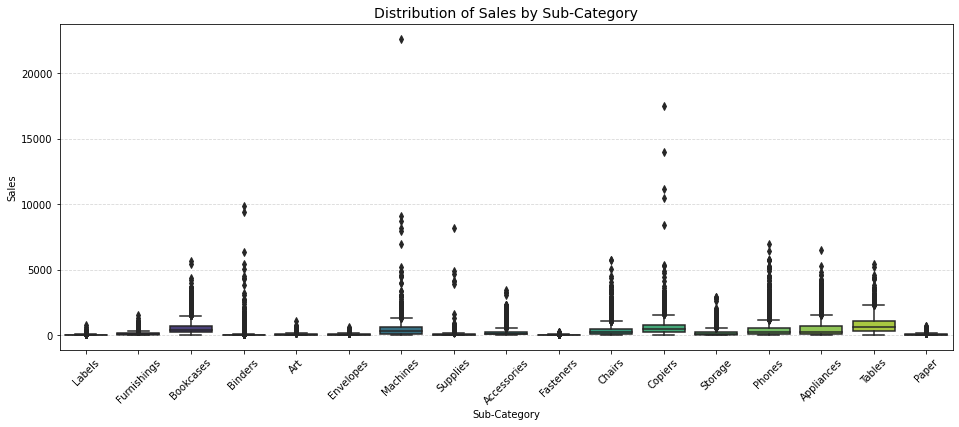

In [21]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='Sub-Category', y='Sales', palette='viridis')
plt.title('Distribution of Sales by Sub-Category', fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

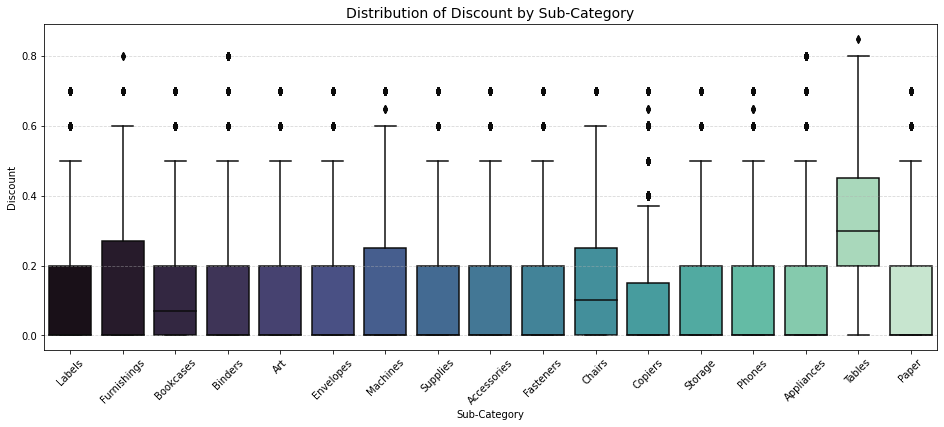

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='Sub-Category', y='Discount', palette='mako')
plt.title('Distribution of Discount by Sub-Category', fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

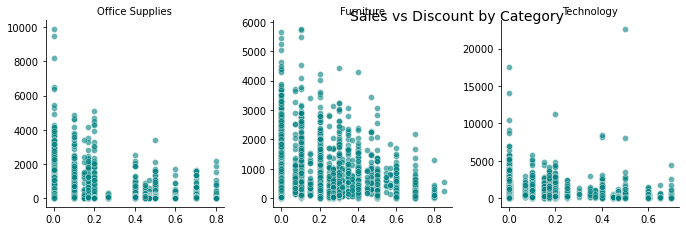

In [23]:
g = sns.FacetGrid(df, col='Category', col_wrap=4, height=3.2, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='Discount', y='Sales', alpha=0.6, color='teal')
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Sales vs Discount by Category", fontsize=14)
plt.show()


In [24]:
subcat_summary = (
    df.groupby('Sub-Category')[['Sales', 'Discount']]
    .mean()
    .sort_values(by='Sales', ascending=False)
    .round(2)
)
display(subcat_summary)

,Sales,Discount
Sub-Category,,
Tables,876.28,0.29
Copiers,673.90,0.12
Bookcases,605.27,0.15
Appliances,564.15,0.14
Machines,530.42,0.17
Phones,502.77,0.15
Chairs,435.29,0.16
Accessories,240.02,0.12
Storage,221.10,0.14


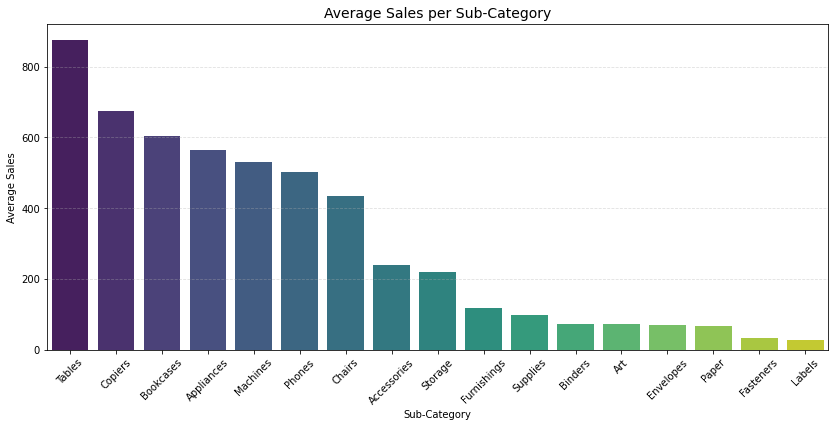

In [25]:
plt.figure(figsize=(14,6))
sns.barplot(x=subcat_summary.index, y='Sales', data=subcat_summary, palette='viridis')
plt.title('Average Sales per Sub-Category', fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


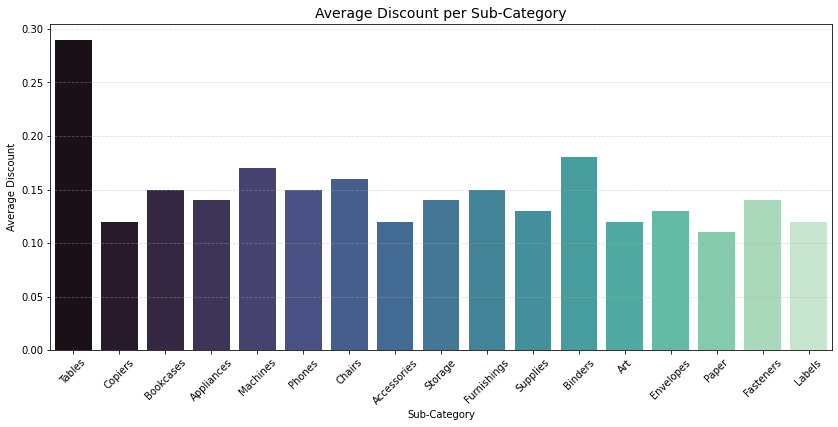

In [26]:
plt.figure(figsize=(14,6))
sns.barplot(x=subcat_summary.index, y='Discount', data=subcat_summary, palette='mako')
plt.title('Average Discount per Sub-Category', fontsize=14)
plt.xlabel('Sub-Category')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


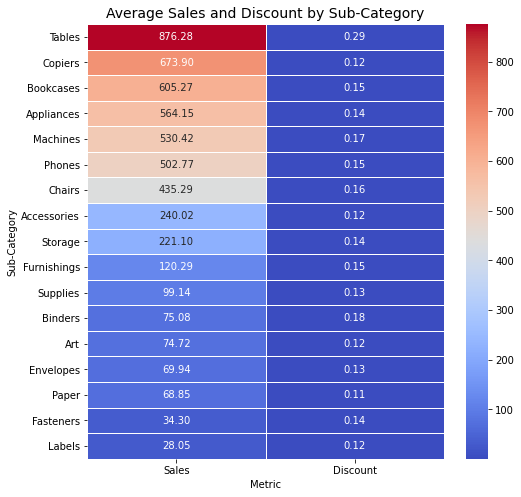

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(subcat_summary, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Average Sales and Discount by Sub-Category", fontsize=14)
plt.xlabel("Metric")
plt.ylabel("Sub-Category")
plt.show()


## RandomizedSearchCV

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import seaborn as sns

def train_gb_for_category(df, category_name):
    print(f"\n Training GradientBoosting for Category: {category_name}")

    df_cat = df[df['Category'] == category_name].copy()

    X = df_cat[['Sales', 'Quantity', 'Discount', 'Shipping Cost',
                'Market', 'Category', 'Sub-Category', 'Segment',
                'Ship Mode', 'Region']]
    y = df_cat['Profit']

    X = pd.get_dummies(X, drop_first=True)

    # Train / Validation / Test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

    #  RandomizedSearchCV
    params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4],
        'subsample': [0.8, 1.0]
    }

    gb = GradientBoostingRegressor(random_state=42)

    rand = RandomizedSearchCV(
        gb, params, cv=3, scoring='r2',
        n_iter=6, random_state=42, n_jobs=-1, verbose=0
    )

    rand.fit(X_train, y_train)

    best_model = rand.best_estimator_
    best_params = rand.best_params_

    # prediction on Validation و Test
    y_pred_val = best_model.predict(X_val)
    y_pred_test = best_model.predict(X_test)

    # Evaluation
    mae_val = mean_absolute_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    r2_val = r2_score(y_val, y_pred_val)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    # Result
    print(f"\n {category_name} Results:")
    print(f"Best Params: {best_params}")
    print(f"Validation -> MAE: {mae_val:.3f}, RMSE: {rmse_val:.3f}, R²: {r2_val:.3f}")
    print(f"Test -> MAE: {mae_test:.3f}, RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

    # feature importance
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
    plt.figure(figsize=(8,4))
    sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
    plt.title(f'Feature Importance for {category_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    
    return {
        'Category': category_name,
        'Best Params': best_params,
        'Validation MAE': mae_val,
        'Validation RMSE': rmse_val,
        'Validation R²': r2_val,
        'Test MAE': mae_test,
        'Test RMSE': rmse_test,
        'Test R²': r2_test
    }


 Training GradientBoosting for Category: Furniture
Train: (6716, 30), Validation: (1439, 30), Test: (1440, 30)

 Furniture Results:
Best Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05}
Validation -> MAE: 56.321, RMSE: 108.244, R²: 0.611
Test -> MAE: 61.694, RMSE: 127.008, R²: 0.577


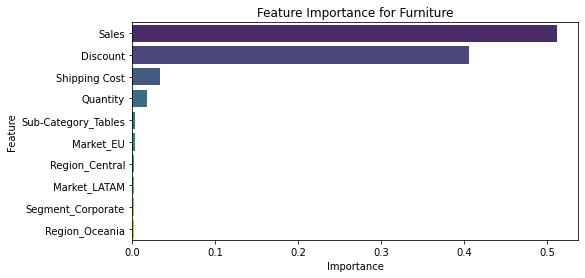

In [14]:
res_furniture = train_gb_for_category(df, 'Furniture')


 Training GradientBoosting for Category: Office Supplies
Train: (21200, 35), Validation: (4543, 35), Test: (4544, 35)

 Office Supplies Results:
Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05}
Validation -> MAE: 17.025, RMSE: 47.862, R²: 0.776
Test -> MAE: 16.801, RMSE: 51.991, R²: 0.845


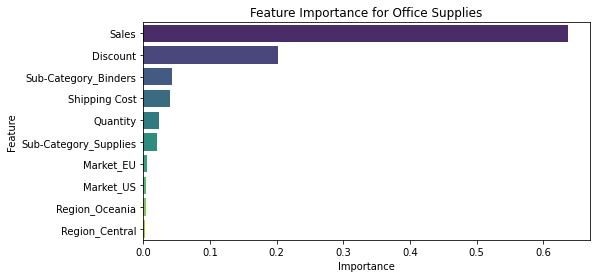

In [15]:
res_office = train_gb_for_category(df, 'Office Supplies')


 Training GradientBoosting for Category: Technology
Train: (6851, 30), Validation: (1468, 30), Test: (1469, 30)

 Technology Results:
Best Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
Validation -> MAE: 69.523, RMSE: 149.760, R²: 0.612
Test -> MAE: 68.673, RMSE: 131.536, R²: 0.646


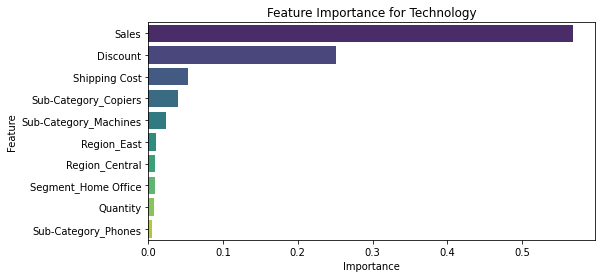

In [16]:
res_tech = train_gb_for_category(df, 'Technology')

In [17]:
results_df = pd.DataFrame([res_furniture, res_office, res_tech])
numeric_cols = ['Validation MAE', 'Validation RMSE', 'Validation R²',
                'Test MAE', 'Test RMSE', 'Test R²']
results_df[numeric_cols] = results_df[numeric_cols].round(4)
results_df = results_df.sort_values(by='Test R²', ascending=False)
pd.set_option('display.max_colwidth', None)

display(results_df)


,Category,Best Params,Validation MAE,Validation RMSE,Validation R²,Test MAE,Test RMSE,Test R²
1,Office Supplies,"{'subsample': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05}",17.0247,47.8617,0.7763,16.8011,51.9906,0.8454
2,Technology,"{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}",69.5231,149.7602,0.6118,68.6729,131.5358,0.6464
0,Furniture,"{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05}",56.3212,108.2445,0.6113,61.6945,127.0084,0.5768


-------------------------------------------------------------

# GridSearchCV


 Category: Office Supplies
Train: (21200, 35), Validation: (4543, 35), Test: (4544, 35)


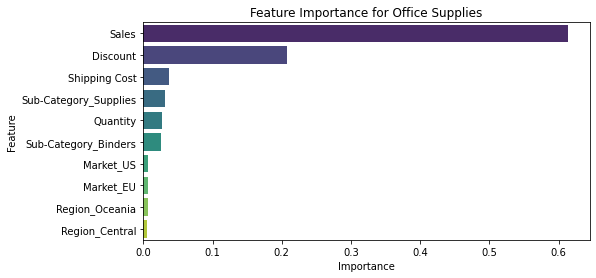


 Category: Furniture
Train: (6716, 30), Validation: (1439, 30), Test: (1440, 30)


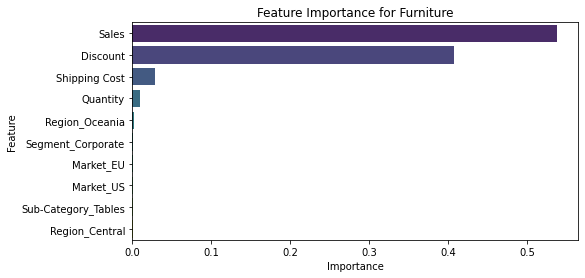


 Category: Technology
Train: (6851, 30), Validation: (1468, 30), Test: (1469, 30)


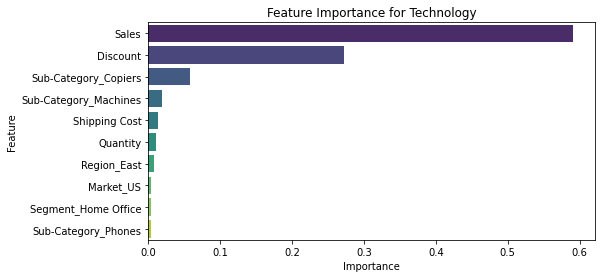

,Category,Best Params,Validation MAE,Validation RMSE,Validation R²,Test MAE,Test RMSE,Test R²
0,Office Supplies,"{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}",16.8541,46.9525,0.7847,16.5090,52.0475,0.8451
2,Technology,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}",70.7835,144.9857,0.6362,68.4635,127.6413,0.6670
1,Furniture,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}",57.2411,108.9258,0.6064,62.2360,127.9848,0.5703


In [18]:
categories = df['Category'].unique()
results = []

for cat in categories:
    print(f"\n Category: {cat}")
    df_cat = df[df['Category'] == cat].copy()

    X = df_cat[['Sales', 'Quantity', 'Discount','Shipping Cost',
                'Market', 'Category', 'Sub-Category',
                'Segment','Ship Mode','Region']]
    y = df_cat['Profit']

    X = pd.get_dummies(X, drop_first=True)

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

    params = {
        'n_estimators': [200, 300],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    }

    gb = GradientBoostingRegressor(random_state=42)
    grid = GridSearchCV(gb, params, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_params = grid.best_params_

    # prediction on Validation و Test
    y_pred_val = best_model.predict(X_val)
    y_pred_test = best_model.predict(X_test)

    # Evaluation
    mae_val = mean_absolute_error(y_val, y_pred_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    r2_val = r2_score(y_val, y_pred_val)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)

    # Result
    results.append({
        'Category': cat,
        'Best Params': best_params,
        'Validation MAE': mae_val,
        'Validation RMSE': rmse_val,
        'Validation R²': r2_val,
        'Test MAE': mae_test,
        'Test RMSE': rmse_test,
        'Test R²': r2_test
    })

    # feature importance
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
    plt.figure(figsize=(8,4))
    sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
    plt.title(f'Feature Importance for {cat}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


    
    results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test R²', ascending=False)

numeric_cols = ['Validation MAE', 'Validation RMSE', 'Validation R²',
                'Test MAE', 'Test RMSE', 'Test R²']
results_df[numeric_cols] = results_df[numeric_cols].round(4)

pd.set_option('display.max_colwidth', None)
display(results_df)

# log Transformation 

In [7]:
df_log = df[df['Profit'] > 0].copy()

df_log['Profit_log'] = np.log(df_log['Profit'])

print(df_log[['Profit', 'Profit_log']].head())

   Profit  Profit_log
0    4.56    1.517323
1   90.72    4.507778
2   54.08    3.990464
3    4.96    1.601406
4   11.44    2.437116


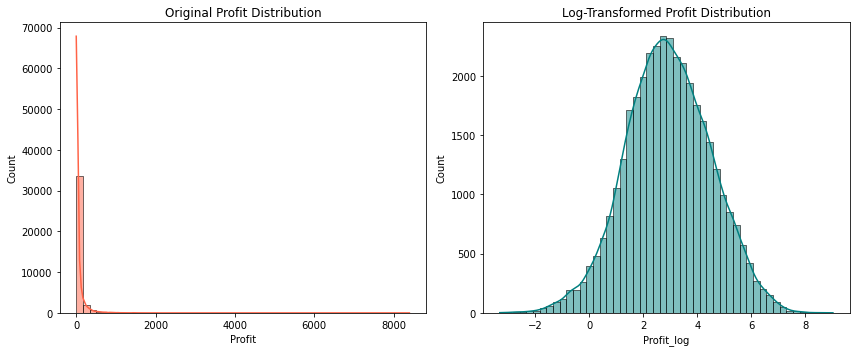

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_log['Profit'], bins=50, kde=True, color='tomato')
plt.title('Original Profit Distribution')

plt.subplot(1,2,2)
sns.histplot(df_log['Profit_log'], bins=50, kde=True, color='teal')
plt.title('Log-Transformed Profit Distribution')

plt.tight_layout()
plt.show()


In [21]:
#df['Profit_log'] = np.log1p(df['Profit'])  # log(1 + Profit)
df['Profit_log'] = np.log1p(df['Profit'].clip(lower=-0.999999))

In [22]:
X = df[['Sales', 'Quantity', 'Discount', 'Shipping Cost',
        'Market', 'Category', 'Sub-Category', 'Segment', 'Ship Mode', 'Region']]

y = df['Profit_log']

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Train: (34769, 45), Validation: (7450, 45), Test: (7451, 45)


# Gradient Boosting

In [24]:
#Gradient Boosting + GridSearchCV
params = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingRegressor(random_state=42)
grid = GridSearchCV(gb, params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("\n Best Params:", grid.best_params_)


 Best Params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}


In [25]:
# Evaluation Function

def evaluate(model, X, y_true, dataset_name):
    # Predict log values
    y_pred_log = model.predict(X)
    # Convert back to original profit scale
    y_pred = np.expm1(y_pred_log)
    y_true_original = np.expm1(y_true)

    mae = mean_absolute_error(y_true_original, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true_original, y_pred))
    r2 = r2_score(y_true_original, y_pred)

    print(f"\n {dataset_name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

    return {'Dataset': dataset_name, 'MAE': mae, 'RMSE': rmse, 'R²': r2}


# Evaluate on Train / Validation / Test

results = []
results.append(evaluate(best_model, X_train, y_train, "Train"))
results.append(evaluate(best_model, X_val, y_val, "Validation"))
results.append(evaluate(best_model, X_test, y_test, "Test"))

# Convert to DataFrame
results_df = pd.DataFrame(results)
display(results_df)


 Train Results:
MAE: 28.43
RMSE: 87.91
R²: 0.5652

 Validation Results:
MAE: 29.40
RMSE: 109.83
R²: 0.6007

 Test Results:
MAE: 27.57
RMSE: 91.15
R²: 0.3912


,Dataset,MAE,RMSE,R²
0,Train,28.425474,87.909553,0.565238
1,Validation,29.399533,109.831954,0.600680
2,Test,27.571364,91.151520,0.391212


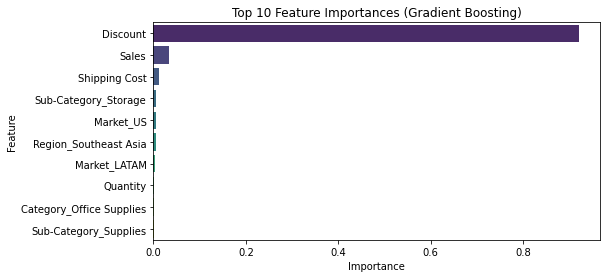

In [26]:
# Feature Importance Visualization

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(8,4))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Top 10 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# LightGBM

In [30]:
from lightgbm import LGBMRegressor

lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [-1, 5, 10]
}
lgbm = LGBMRegressor(random_state=42, verbose=-1)
grid_lgbm = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='r2', n_jobs=-1)
grid_lgbm.fit(X_train, y_train)

print("LightGBM Best Params:", grid_lgbm.best_params_)


LightGBM Best Params: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100}


In [31]:
# Evaluate on Train / Validation / Test
best_model = grid_lgbm.best_estimator_
results = []
results.append(evaluate(best_model, X_train, y_train, "Train"))
results.append(evaluate(best_model, X_val, y_val, "Validation"))
results.append(evaluate(best_model, X_test, y_test, "Test"))

# Convert to DataFrame
results_df = pd.DataFrame(results)
display(results_df)


 Train Results:
MAE: 30.16
RMSE: 103.93
R²: 0.3924

 Validation Results:
MAE: 30.85
RMSE: 145.58
R²: 0.2985

 Test Results:
MAE: 27.55
RMSE: 89.40
R²: 0.4143


,Dataset,MAE,RMSE,R²
0,Train,30.163328,103.927059,0.392373
1,Validation,30.847800,145.575803,0.298476
2,Test,27.549213,89.404466,0.414325
